# NGC 0362

## NGC0362 Introduction

NGC 0362는 볼록렌즈 모양의 구상성단으로, 우리 은하계 내에 위치하고 있습니다. 이 천체는 남반구의 하늘에서 관측될 수 있으며, 특히 천문학자들 사이에서는 그 구성과 연령, 금속 함량 등이 매우 흥미롭게 연구되고 있습니다. 구상성단은 별들이 밀집해 있는 구형의 집단으로, 우리 은하와 다른 은하계에서 흔히 발견됩니다.


1826년 8월 1일 스코틀랜드의 천문학자인 제임스 던롭에 의해 발견되었으며 중심의 핵이 두드러지는 단계인 III형 구상성단에 속한다.

다른 구상성단들에 비해 금속성이 매우 높고 쌍성이 매우 많은데 이는 나이가 약 100억년 정도로 매우 젊기 때문이라고 한다.[2]

지구에서 관측했을 때 소마젤란 은하옆에 위치하나 실제론 NGC 362보다 10배 더 멀리 떨어져 있는 별개의 천체들이다.

지금은 거의 원일점에 있기 때문에 은하 중심에서 멀리 있는 것으로 보이나 근일점에서는 은하 중심에서 거의 3,000 광년 밖에 떨어져 있지 않을 정도로 매우 이심률이 높다.

##  Reference

- https://github.com/laingmic005/aperture-photometry/blob/main/L1_fits-handling.ipynb

- https://youtu.be/_DzSIeruotQ?si=ScAl1J5rSqyIt_ap

- https://archive.stsci.edu/prepds/hugs/

# 1. 데이터 전처리

In [1]:
import os

# 대상 폴더 경로 설정
folder_path = '/Users/younghokim/astro/prj1_HUGS/HUGS/ngc0362'

# 폴더 내의 모든 파일 및 폴더 목록을 가져옴
files = os.listdir(folder_path)
list_files = []

# 모든 파일명 출력
for file in files:
    if file.endswith('.fits'):
        list_files.append(file)
        print(file)

hlsp_hugs_hst_wfc3-uvis_ngc0362_f275w_v1_stack-0519s.fits
hlsp_hugs_hst_acs-wfc_ngc0362_f814w_v1_stack-0170s.fits
hlsp_hugs_hst_acs-wfc_ngc0362_f606w_v1_stack-0150s.fits
hlsp_hugs_hst_acs-wfc_ngc0362_f606w_v1_stack-0010s.fits
hlsp_hugs_hst_acs-wfc_ngc0362_f814w_v1_stack-0010s.fits
hlsp_hugs_hst_wfc3-uvis_ngc0362_f336w_v1_stack-0350s.fits
hlsp_hugs_hst_wfc3-uvis_ngc0362_f438w_v1_stack-0054s.fits


In [2]:
import os
os.getcwd()

'/Users/younghokim/astro/prj1_HUGS'

In [3]:
import pandas as pd

# 열에서 보여주는 문자열의 최대 길이 설정 (예: 100)
pd.set_option('display.max_colwidth', 100)

list_files_df = pd.Series(list_files)

In [4]:
os.listdir(folder_path)

['hlsp_hugs_hst_wfc3-uvis_ngc0362_multi_v1_rgb.tif',
 'hlsp_hugs_hst_wfc3-uvis_ngc0362_f275w_v1_stack-0519s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc0362_f814w_v1_stack-0170s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc0362_f606w_v1_stack-0150s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc0362_multi_v1_rgb.png',
 'hlsp_hugs_hst_acs-wfc_ngc0362_f606w_v1_stack-0010s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc0362_f814w_v1_stack-0010s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc0362_f336w_v1_stack-0350s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc0362_f438w_v1_stack-0054s.fits',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0362_multi_v1_catalog-meth3.txt',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0362_multi_v1_catalog-meth2.txt',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0362_multi_v1_catalog-meth1.txt',
 'hlsp_hugs_hst_wfc3-uvis_ngc0362_multi_v1_cmd.png']

- hlsp_hugs_hst_wfc3-uvis_ngc0362_f275w_v1_stack-0519s.fits
- hlsp_hugs_hst_wfc3-uvis_ngc0362_f336w_v1_stack-0350s.fits
- hlsp_hugs_hst_wfc3-uvis_ngc0362_f438w_v1_stack-0054s.fits

위 3개의 파일을 활용

## 1.1 Fits 파일 불러오기

In [5]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Target filter는 275w, 336w, 438w 
print(list_files_df)

0    hlsp_hugs_hst_wfc3-uvis_ngc0362_f275w_v1_stack-0519s.fits
1      hlsp_hugs_hst_acs-wfc_ngc0362_f814w_v1_stack-0170s.fits
2      hlsp_hugs_hst_acs-wfc_ngc0362_f606w_v1_stack-0150s.fits
3      hlsp_hugs_hst_acs-wfc_ngc0362_f606w_v1_stack-0010s.fits
4      hlsp_hugs_hst_acs-wfc_ngc0362_f814w_v1_stack-0010s.fits
5    hlsp_hugs_hst_wfc3-uvis_ngc0362_f336w_v1_stack-0350s.fits
6    hlsp_hugs_hst_wfc3-uvis_ngc0362_f438w_v1_stack-0054s.fits
dtype: object


In [6]:
# fits 파일 열기 
fits_f275w = fits.open('HUGS/ngc0362/hlsp_hugs_hst_wfc3-uvis_ngc0362_f275w_v1_stack-0519s.fits')
fits_f336w = fits.open('HUGS/ngc0362/hlsp_hugs_hst_wfc3-uvis_ngc0362_f336w_v1_stack-0350s.fits')
fits_f438w = fits.open('HUGS/ngc0362/hlsp_hugs_hst_wfc3-uvis_ngc0362_f438w_v1_stack-0054s.fits')

In [7]:
print(fits_f275w)
print(fits_f336w)
print(fits_f438w)

In [8]:
# FITS 파일 안의 첫 번째 헤더 (Primary Header)에서 적경과 적위 정보 읽기
header_f275w = fits_f275w[0].header
header_f336w = fits_f336w[0].header
header_f438w = fits_f438w[0].header
 
ra_f275w = header_f275w['RA_TARG']  # 적경 정보
dec_f275w = header_f275w['DEC_TARG']  # 적위 정보

ra_f336w = header_f336w['RA_TARG']  # 적경 정보
dec_f336w = header_f336w['DEC_TARG']  # 적위 정보

ra_f438w = header_f438w['RA_TARG']  # 적경 정보
dec_f438w = header_f438w['DEC_TARG']  # 적위 정보


# 정보 출력
print(f'Right Ascension of fits_f275w (RA): {ra_f275w}')
print(f'Declination of fits_f275w (Dec): {dec_f275w}')

print(f'Right Ascension of fits_f336w (RA): {ra_f336w}')
print(f'Declination of fits_f336w (Dec): {dec_f336w}')

print(f'Right Ascension of fits_f438w (RA): {ra_f438w}')
print(f'Declination of fits_f438w (Dec): {dec_f438w}')


Right Ascension of fits_f275w (RA): 15.80941666666667
Declination of fits_f275w (Dec): -70.84877777777777
Right Ascension of fits_f336w (RA): 15.80941666666667
Declination of fits_f336w (Dec): -70.84877777777777
Right Ascension of fits_f438w (RA): 15.80941666666667
Declination of fits_f438w (Dec): -70.84877777777777


In [9]:
# f275w 필터 이미지 데이터 EDA

image_data_f275w = fits_f275w[0].data
print(image_data_f275w)
print(type(image_data_f275w))
print(image_data_f275w.shape)

# f336w 필터 이미지 데이터 EDA

image_data_f336w = fits_f336w[0].data
print(image_data_f336w)
print(type(image_data_f336w))
print(image_data_f336w.shape)

# f438w 필터 이미지 데이터 EDA

image_data_f438w = fits_f438w[0].data
print(image_data_f438w)
print(type(image_data_f438w))
print(image_data_f438w.shape)


[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)
[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)
[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)


3개의 fits 파일 모두 같은 천체를 바라보고 있는 점을 확인

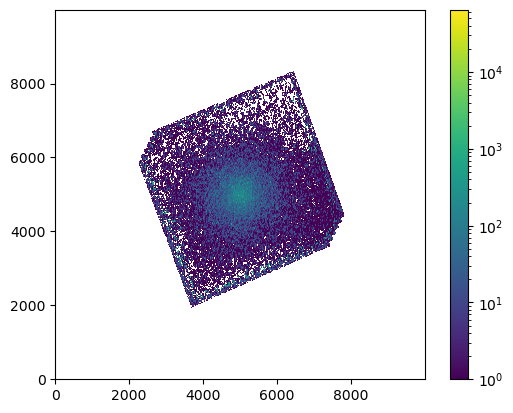

In [10]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [11]:
image_data_center_f275w = image_data_f275w[4000:6000, 4000:6000]

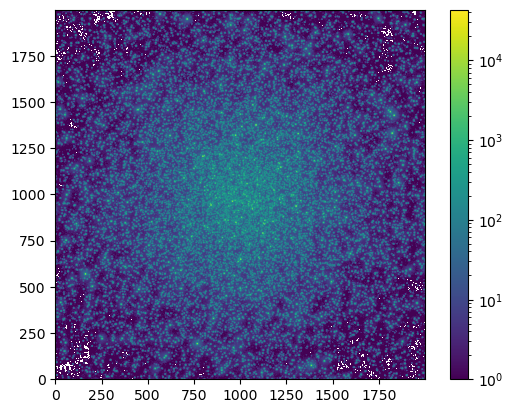

In [12]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f275w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

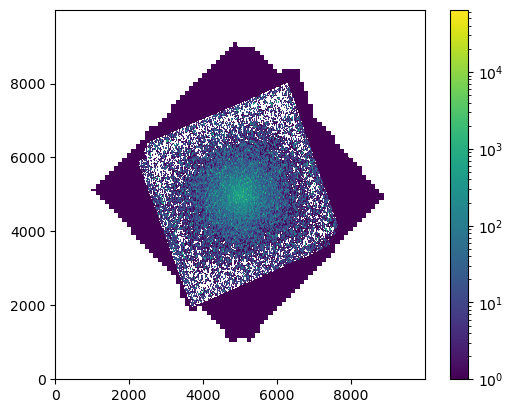

In [13]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f336w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [14]:
image_data_center_f336w = image_data_f336w[4000:6000, 4000:6000]

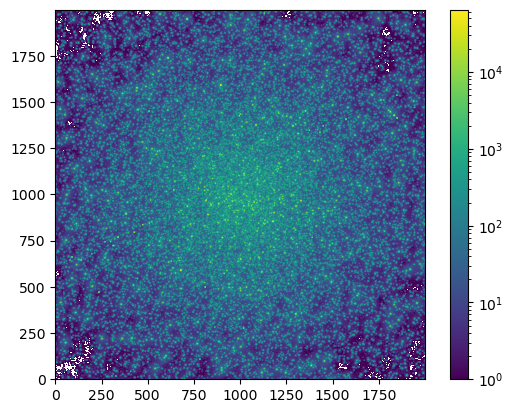

In [15]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f336w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

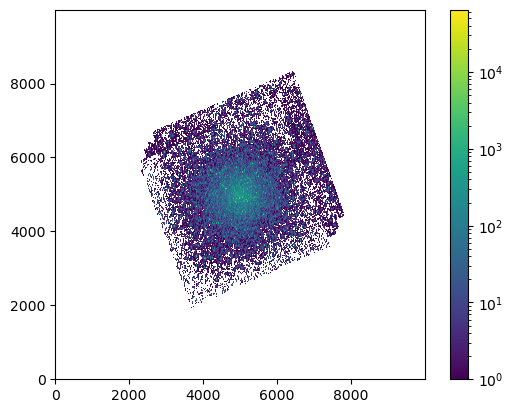

In [16]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f438w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [17]:
image_data_center_f438w = image_data_f438w[4000:6000, 4000:6000]

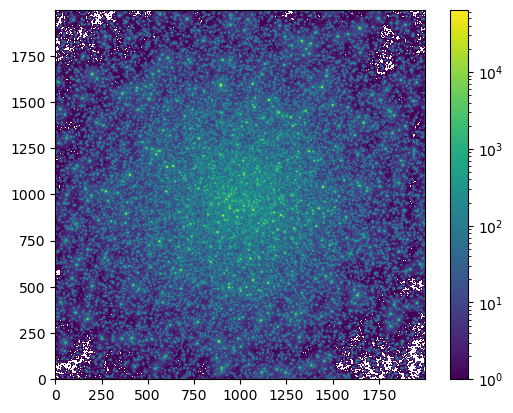

In [18]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f438w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

- plt.imshow()에서 origin의 역할
  
> plt.imshow() 함수에서 origin 매개변수는 이미지를 표시할 때 픽셀 좌표 시스템의 원점을 어디에 두는지를 지정하는 역할을 합니다. 이 매개변수는 이미지의 표시 방향을 제어하기 위해 사용됩니다.
>
> origin='upper' (기본값): 좌측 상단 모서리를 원점으로 간주합니다. 이 경우, 픽셀 좌표는 왼쪽 상단 모서리에서 시작하여 아래쪽으로 행이 증가하고 오른쪽으로 열이 증가합니다. 이것은 일반적인 이미지 표시 방식과는 다릅니다.
>
> origin='lower': 좌측 하단 모서리를 원점으로 간주합니다. 이 경우, 픽셀 좌표는 왼쪽 하단 모서리에서 시작하여 위쪽으로 행이 증가하고 오른쪽으로 열이 증가합니다. 이것은 일반적인 이미지 표시 방식과 일치합니다.
>
> 대부분의 경우, 이미지 데이터는 origin='upper'로 저장되어 있기 때문에 origin 매개변수를 따로 지정할 필요가 없습니다. 그러나 이미지 데이터가 origin='lower'로 저장되어 있는 경우, 표시 방식을 올바르게 하기 위해 이 매개변수를 설정할 수 있습니다.

## 1.2 그레이 스케일로 나타내기

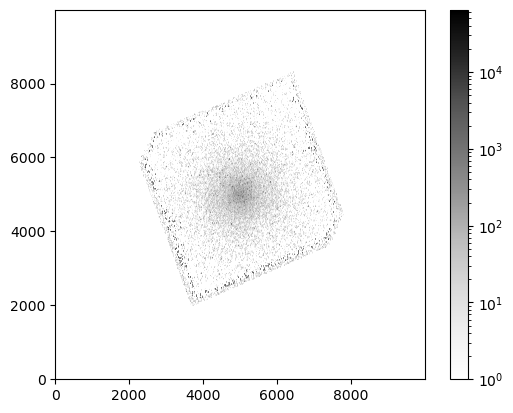

In [19]:
# cmap을 'Greys'로 바꾸고 norm을 LogNorm으로 바꾸기
# 데이터의 범위, order가 넓다 보니 LogNorm으로 정규화함

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Greys 컬러맵의 f275w 이미지 

plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

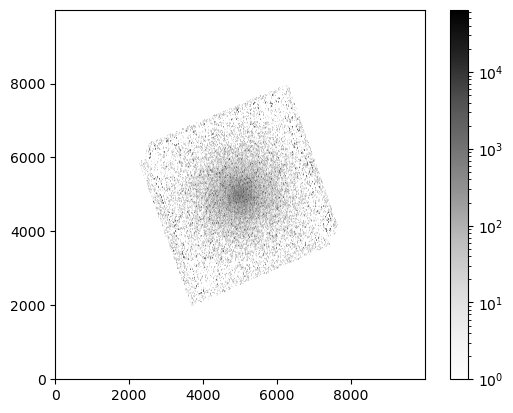

In [20]:
# Greys 컬러맵의 f336w 이미지 
plt.figure()
plt.imshow(image_data_f336w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

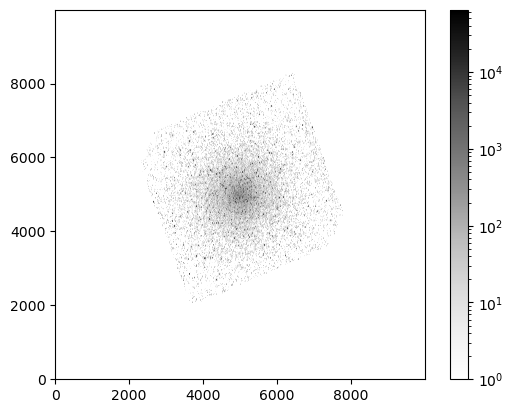

In [21]:
# Greys 컬러맵의 f475w 이미지 
plt.figure()
plt.imshow(image_data_f438w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

**(참고)**

- 데이터의 작은 부분에 집중하기 위해서는 이미지에서 x와 y의 범위를 선택하여 특정 영역에 포커싱해서 fits 이미지를 살펴봄

- 전체 dimension을 확인하기 위해 info() 함수나 .shape을 사용 

In [22]:
# FITS 데이터를 RGB 이미지로 변환합니다.
# 이 예제에서는 파장1을 빨강(R), 파장2를 녹색(G), 파장3을 파랑(B)으로 사용합니다.
rgb_image = np.dstack((image_data_f275w, image_data_f336w, image_data_f438w))
rgb_image.shape

(10000, 10000, 3)

In [23]:
from PIL import Image

# RGB 이미지를 PIL 이미지로 변환
pil_image = Image.fromarray((rgb_image * 255).astype(np.uint8))

# save 함수 이용 이미지 저장
pil_image.save('plot/ngc0362_PIL_Image_rgb.jpg')

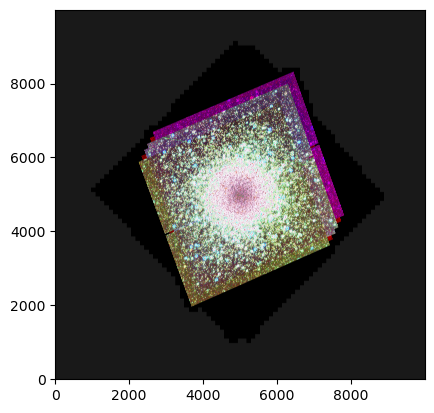

In [24]:
plt.imshow(pil_image, origin = 'lower')
plt.show()

In [25]:
type(image_data_f275w)

numpy.ndarray

## 1.3 lupton RGB 



<img src="./image/stretching.png" width="400" height="400"/>

asinh stretching(명암 대비) 방법을 사용하는 make_lupton_rgb 함수를 활용하여 시각화

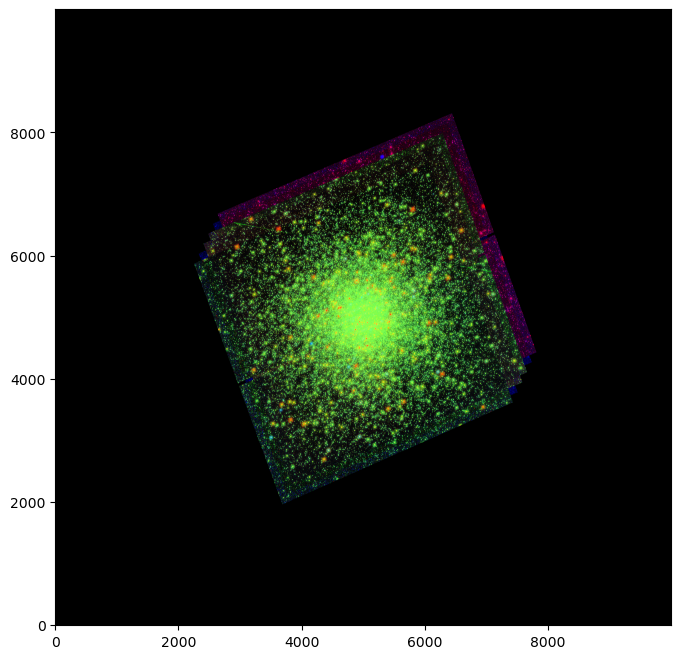

In [26]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

b = image_data_f275w.copy()
g = image_data_f336w.copy()
r = image_data_f438w.copy()

plt.figure(figsize = (8, 8))
rgb_default = make_lupton_rgb(r, g, b, filename="plot/ngc0362_lupton_rgb_basic.png",)
plt.imshow(rgb_default, origin='lower')

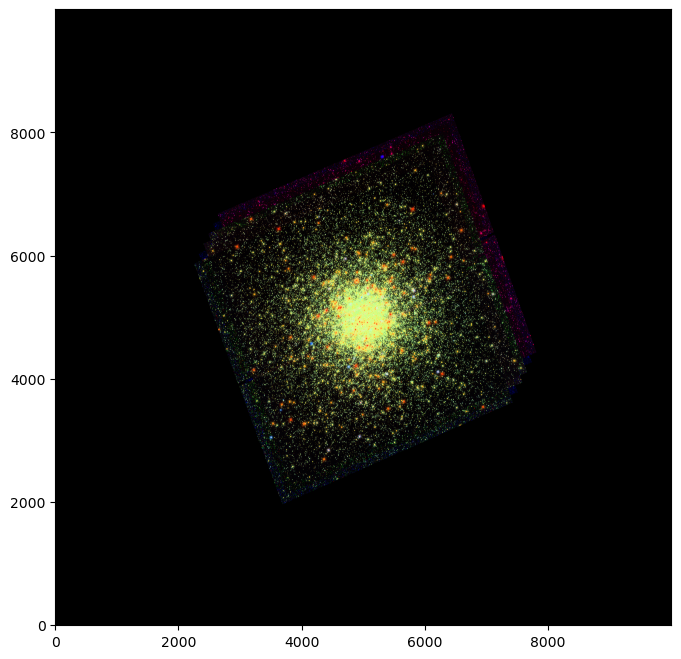

In [27]:
# stretch와 Q값 조절 #1

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

plt.figure(figsize = (8, 8))
rgb_default = make_lupton_rgb(r*1.0, g*0.6, b*1, stretch = 20, Q = 1, filename="plot/ngc0362_lupton_rgb_tune_1.png")
plt.imshow(rgb_default, origin='lower')

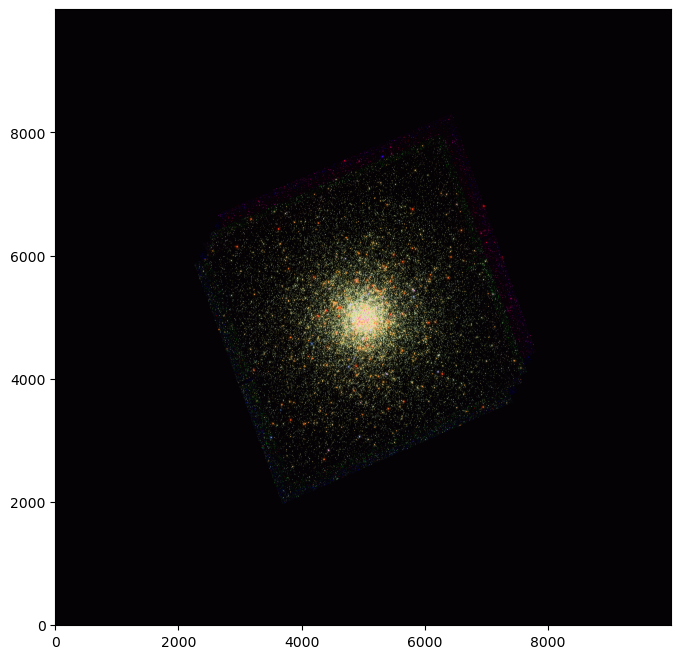

In [109]:
# stretch와 Q값 조절 # 2

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 
max_f275w = np.max(image_data_f275w)
max_f336w = np.max(image_data_f336w)
max_f438w = np.max(image_data_f438w)

imputed_data2_f275w = np.where(image_data_f275w < 1, 1, image_data_f275w)
imputed_data2_f336w = np.where(image_data_f336w < 1, 1, image_data_f336w)
imputed_data2_f438w = np.where(image_data_f438w < 1, 1, image_data_f438w)


b = imputed_data2_f275w.copy()
g = imputed_data2_f336w.copy()
r = imputed_data2_f438w.copy()

t_r = 255
r[r > t_r] = t_r

t_g = 255
g[g > t_g] = t_g

t_b = 255
b[b > t_b] = t_b

rgb_default = make_lupton_rgb(r*1.7, g*1, b*1.9, stretch = 100, Q = 0.001, filename="plot/ngc0362_lupton_rgb_tune_2.png")
plt.figure(figsize= (8, 8))
plt.imshow(rgb_default, origin='lower')

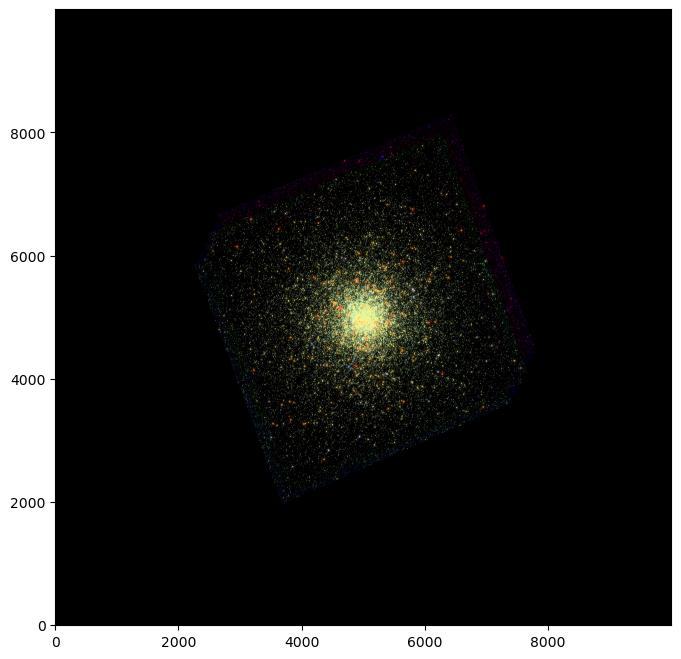

In [130]:
# stretch와 Q값 조절 # 2

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 
max_f275w = np.max(image_data_f275w)
max_f336w = np.max(image_data_f336w)
max_f438w = np.max(image_data_f438w)

# truncation 삭제
# imputed_data2_f275w = np.where(image_data_f275w < 1, 1, image_data_f275w)
# imputed_data2_f336w = np.where(image_data_f336w < 1, 1, image_data_f336w)
# imputed_data2_f438w = np.where(image_data_f438w < 1, 1, image_data_f438w)


b = image_data_f275w.copy()
g = image_data_f336w.copy()
r = image_data_f438w.copy()


t_r = 320
r[r > t_r] = t_r

t_g = 500
g[g > t_g] = t_g

t_b = 100
b[b > t_b] = t_b

rgb_default = make_lupton_rgb(r*1.7, g*1.0, b*2.2, stretch = 100, Q = 0.01, filename="plot/ngc0362_lupton_rgb_tune_3.png")
plt.figure(figsize= (8, 8))
plt.imshow(rgb_default, origin='lower')

----

HUGS 제공 RGB 합성 사진 (목표 사진/모범 답안)
---

<img src="./HUGS/ngc0362/hlsp_hugs_hst_wfc3-uvis_ngc0362_multi_v1_rgb.png" width="800" height="800"/>

In [30]:
import os
os.getcwd()

'/Users/younghokim/astro/prj1_HUGS'

# 2. Photutils-detection

* Photutils: An Astropy Package for Photometry

> `Photutils`는 파이썬의 과학 이미지 처리 및 천체학 이미지 분석을 위한 패키지입니다. 'photutils'는 다양한 이미 처리 작업에 사용되며, 주로 천문학에서 물체의 위치, 밝기, 크기 및 형태를 추출하고 측정하는 데 사용됩니다. 다음은 photutils의 주요 기능과 몇 가지 예시입니다:
> 
> 1. **Aperture Photometry**: photutils를 사용하여 이미지에서 특정 물체 주위의 원 또는 타원 모양의 영역(아파처)을 정의하고 해당 아파처 내의 픽셀 값을 합산하여 물체의 밝기를 측정할 수 있습니다. 이것은 천체학적 객체의 등급 측정에 유용합니다.
> 
> 2. **PSF Photometry**: Point Spread Function (PSF) 기반의 천체 항목 검출 및 등급 측정을 수행합니다. 이것은 천체학 이미지에서 별과 같은 지점 소스를 분석하는 데 사용됩니다.
>
> 3. **Background Subtraction**: 이미지에서 백그라운드 레벨을 추정하고 이를 천체학적 객체의 밝기 측정에 사용할 수 있습니다.
>
> 4. **Detection and Segmentation**: 물체를 감지하고 분할(segment)하는 도구를 제공합니다. 물체의 위치를 식별하고 관심 물체를 분리하는 데 사용됩니다.
> 
> 5. **Photometry Algorithms**: 여러 가지 다양한 천체학적 등급 측정 알고리즘을 제공하며 사용자는 필요에 따라 선택할 수 있습니다.
> 
> photutils는 간단한 작업부터 복잡한 이미지 분석 작업까지 다양한 천체학적 이미지 처리 작업을 수행할 수 있는 강력한 도구를 제공합니다. 이 패키지는 과학 연구 및 천체학 연구에서 자주 사용되며, 파이썬으로 이미지 처리 및 분석을 수행하려는 연구자 및 과학자에게 유용합니다.

## 2.1 simga clipped stats

In [31]:
# 이상치가 제거된 범위 안에서 mean, median and standard deviation 찾기

from astropy.stats import sigma_clipped_stats
mean_f275w, median_f275w, std_f275w = sigma_clipped_stats(image_data_f275w, sigma = 3.0) # 기본값이 sigma = 3
mean_f336w, median_f336w, std_f336w = sigma_clipped_stats(image_data_f336w, sigma = 3.0)
mean_f438w, median_f438w, std_f438w = sigma_clipped_stats(image_data_f438w, sigma = 3.0)

sigma-clipping 

>    Perform sigma-clipping on the provided data.
>
>   The data will be iterated over, each time rejecting values that are
    less or more than a specified number of standard deviations from a
    center value.
>
>   Clipped (rejected) pixels are those where::
>
>        data < center - (sigma_lower * std)
>        data > center + (sigma_upper * std)
>
>    where::
>
>        center = cenfunc(data [, axis=])
>        std = stdfunc(data [, axis=])
>
>    Invalid data values (i.e., NaN or inf) are automatically clipped.
>
>    For an object-oriented interface to sigma clipping, see
>    :class:`SigmaClip`.
>

sigma_clipped_stats 함수는 주어진 데이터에서 이상치를 제외하고 계산된 평균, 중간값, 표준 편차를 반환합니다. 이를 사용하여 데이터의 중심 경향성과 분포를 이상치에 영향받지 않고 더 정확하게 평가할 수 있습니다.

$$\frac{{\sigma}_{old} - {\sigma}_{new}}{{\sigma}_{new}}$$

In [32]:
# print data
print(f'mean of image_data_f275w: {mean_f275w}')
print(f'median of image_data_f275w: {median_f275w}')
print(f'standard deviation of image_data_f275w: {std_f275w}')
print("\n")

# print data
print(f'mean of image_data_f336w: {mean_f336w}')
print(f'median of image_data_f336w: {median_f336w}')
print(f'standard deviation of image_data_f336w: {std_f336w}')
print("\n")

# print data
print(f'mean of image_data_f435w: {mean_f438w}')
print(f'median of image_data_f435w: {median_f438w}')
print(f'standard deviation of image_data_f435w: {std_f438w}')

mean of image_data_f275w: -16.418296813964844
median of image_data_f275w: -25.0
standard deviation of image_data_f275w: 12.18305778503418


mean of image_data_f336w: -16.769630432128906
median of image_data_f336w: -25.0
standard deviation of image_data_f336w: 12.086474418640137


mean of image_data_f435w: -16.64632797241211
median of image_data_f435w: -25.0
standard deviation of image_data_f435w: 12.048914909362793


In [33]:
# 원본 데이터와 비교 

print('Min_f275w:', np.min(image_data_f275w))
print('Max_f275w:', np.max(image_data_f275w))
print('Mean_f275w:', np.mean(image_data_f275w))
print("Median_f275w:", np.median(image_data_f275w))
print('Stdev_f275w:', np.std(image_data_f275w))
print('-'*50)

print('Min_f336w:', np.min(image_data_f336w))
print('Max_f336w:', np.max(image_data_f336w))
print('Mean_f336w:', np.mean(image_data_f336w))
print('Median_f336w:', np.median(image_data_f336w)) 
print('Stdev_f336w:', np.std(image_data_f336w))
print('-'*50)

print('Min_f435w:', np.min(image_data_f438w))
print('Max_f435w:', np.max(image_data_f438w))
print('Mean_f435w:', np.mean(image_data_f438w))
print('Median_f435w:', np.median(image_data_f438w))
print('Stdev_f435w:', np.std(image_data_f438w))

Min_f275w: -39.0
Max_f275w: 64750.0
Mean_f275w: -12.454351
Median_f275w: -25.0
Stdev_f275w: 304.1195
--------------------------------------------------
Min_f336w: -33.0
Max_f336w: 64750.0
Mean_f336w: -7.7843575
Median_f336w: -25.0
Stdev_f336w: 344.67563
--------------------------------------------------
Min_f435w: -25.0
Max_f435w: 64750.0
Mean_f435w: -11.545365
Median_f435w: -25.0
Stdev_f435w: 260.382


## 2.2 DAOStarFinder

In [34]:
'''Use DAOStarFinder to detect stars'''

from photutils.detection import DAOStarFinder

# 가우시안 커널을 이용하는 DAOStarFinder 이용, 소스 확인
# DAOStarFinder의 인스턴스를 사용하여 이미지에서 약 3픽셀의 FWHM을 가지며 배경보다 약 5 시그마 위에 피크가 있는 별을 찾도록 설정 
daofind_f275w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f275w)
daofind_f336w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f336w)
daofind_f438w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f438w)

# 백그라운드(배경)의 값을 빼준 2D-array에서 별을 찾도록 daofind 함수 적용
sources_f275w = daofind_f275w(image_data_f275w - median_f275w)
sources_f336w = daofind_f336w(image_data_f336w - median_f336w)
sources_f438w = daofind_f438w(image_data_f438w - median_f438w)

In [35]:
print(f'sources_f275w의 길이는 {len(sources_f275w)}')
print(f'sources_f336w의 길이는 {len(sources_f336w)}')
print(f'sources_f435w의 길이는 {len(sources_f438w)}')

sources_f275w의 길이는 35847
sources_f336w의 길이는 48988
sources_f435w의 길이는 43083


In [36]:
# format sources table 
for col in sources_f275w.colnames:
    if col not in ('id', 'npix'):
        sources_f275w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f275w.pprint(max_width = 76)
print("= ="*40)
#-----------------------------------------------------------#
for col in sources_f336w.colnames:
    if col not in ('id', 'npix'):
        sources_f336w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f336w.pprint(max_width = 76)
print("= ="*40)
#-----------------------------------------------------------#
for col in sources_f438w.colnames:
    if col not in ('id', 'npix'):
        sources_f438w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f438w.pprint(max_width = 76)
print("= ="*40)

  id  xcentroid ycentroid sharpness roundness1 ... sky    peak   flux  mag 
----- --------- --------- --------- ---------- ... ---- ------- ----- -----
    1   3708.57   1967.54      0.77       0.65 ... 0.00  405.00  5.06 -1.76
    2   3712.00   1984.80      0.68       0.59 ... 0.00  387.00  5.15 -1.78
    3   3728.37   1984.58      0.74      -0.16 ... 0.00  519.00  6.68 -2.06
    4   3725.53   1994.72      0.84       0.33 ... 0.00 1354.00 16.41 -3.04
    5   3721.02   2001.16      0.94      -0.04 ... 0.00  645.00  7.62 -2.20
    6   3754.33   2000.88      0.99      -0.24 ... 0.00  443.00  4.91 -1.73
    7   3678.66   2002.17      0.92      -0.19 ... 0.00 6104.00 74.43 -4.68
  ...       ...       ...       ...        ... ...  ...     ...   ...   ...
35841   6293.43   8242.82      0.82      -0.22 ... 0.00  101.00  1.02 -0.02
35842   6455.39   8250.88      0.70       0.29 ... 0.00  731.00 10.13 -2.51
35843   6348.94   8257.16      0.83       0.94 ... 0.00 2436.00 28.84 -3.65
35844   6418

### CircularAperture

#### f275w visualization

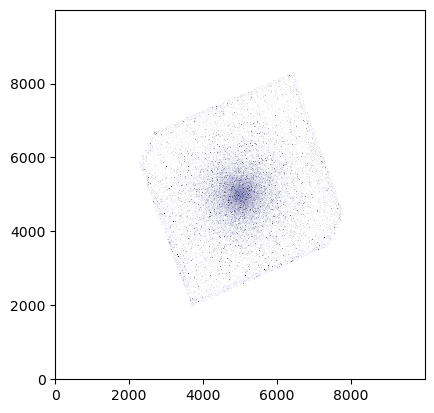

In [37]:
# matplotlib를 이용한 구상성단 시각화

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f275w = np.transpose((sources_f275w['xcentroid'], sources_f275w['ycentroid']))
apertures_f275w = CircularAperture(positions_f275w, r = 5.0)
plt.imshow(image_data_f275w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f275w.plot(color = 'blue', lw = 0.1, alpha = 0.1);

#### f336w visualization

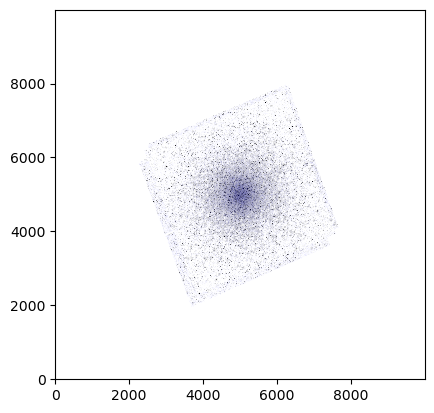

In [38]:
# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f336w = np.transpose((sources_f336w['xcentroid'], sources_f336w['ycentroid']))
apertures_f336w = CircularAperture(positions_f336w, r = 5.0)
plt.imshow(image_data_f336w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f336w.plot(color = 'blue', lw = 0.1, alpha = 0.1);

#### f435w visualization

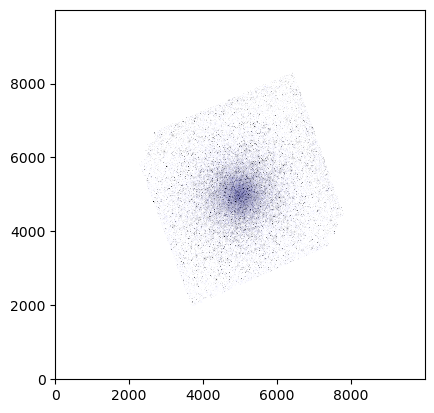

In [39]:
# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f438w = np.transpose((sources_f438w['xcentroid'], sources_f438w['ycentroid']))
apertures_f438w = CircularAperture(positions_f438w, r = 5.0)
plt.imshow(image_data_f438w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f438w.plot(color = 'blue', lw = 0.1, alpha = 0.1);


> Supported values for interpolation are 
> 'bicubic', 'antialiased', 'spline36', 'bilinear', 'gaussian', 
> 'lanczos', 'blackman', 'nearest', 'kaiser', 'quadric', 'mitchell', 
> 'catrom', 'hanning', 'none', 'spline16', 
> 'bessel', 'hermite', 'hamming', 'sinc'


### Find peaks

- 피크 픽셀을 찾는 방법

    + 피크는 로컬 영역 내에서 임계값을 초과하는 최대값

        * 로컬 영역 내의 여러 픽셀이 동일한 강도를 갖는 경우 해당 픽셀의 좌표를 모두 반환
        * 그렇지 않을 경우, 로컬 영역당 피크 픽셀이 하나만 있음
        * 따라서 정의된 영역은 영역 내에 동일한 피크가 없는 한 피크 간 최소 간격을 효과적으로 부과할 수 있음
        * 또한 픽셀이므로 결과는 정수 좌표로 나오게 됨

#### f275w visualization

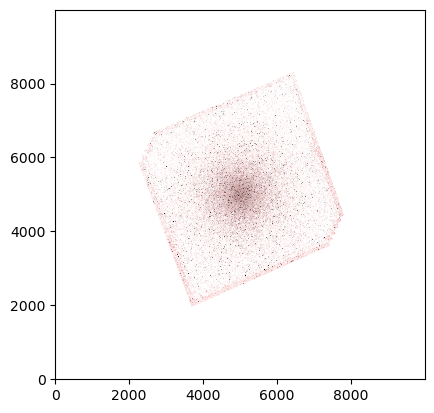

In [40]:
# 사용하는 함수 import 

from photutils.detection import find_peaks

# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f275w = median_f275w + (5.0 * std_f275w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f275w = find_peaks(image_data_f275w - median_f275w, threshold_f275w, box_size = 11)
peaks_f275w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f275w = np.transpose((peaks_f275w['x_peak'], peaks_f275w['y_peak']))
peak_apertures_f275w = CircularAperture(peak_positions_f275w, r = 3.0)
plt.imshow(image_data_f275w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f275w.plot(color = 'red', lw = 0.3, alpha = 0.1);

#### f336w visualization

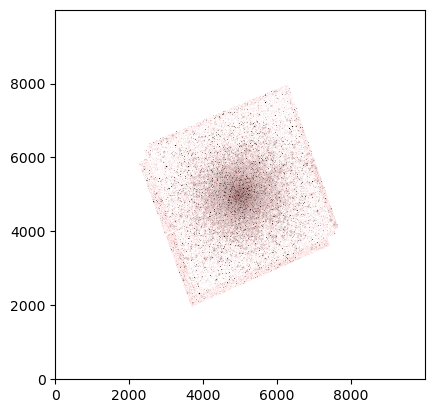

In [41]:
# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f336w = median_f336w + (5.0 * std_f336w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f336w = find_peaks(image_data_f336w - median_f336w, threshold_f336w, box_size = 11)
peaks_f336w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f336w = np.transpose((peaks_f336w['x_peak'], peaks_f336w['y_peak']))
peak_apertures_f336w = CircularAperture(peak_positions_f336w, r = 3.0)
plt.imshow(image_data_f336w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f336w.plot(color = 'red', lw = 0.3, alpha = 0.1);

#### f438w visualization

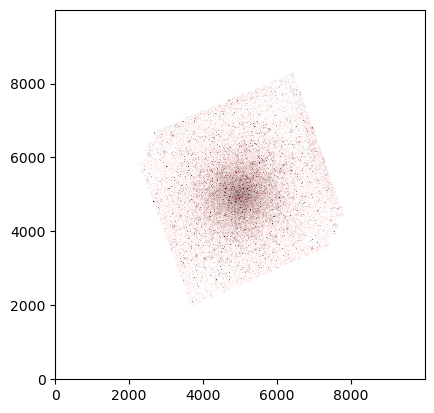

In [42]:
# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f438w = median_f438w + (5.0 * std_f438w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f438w = find_peaks(image_data_f438w - median_f438w, threshold_f438w, box_size = 11)
peaks_f438w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f438w = np.transpose((peaks_f438w['x_peak'], peaks_f438w['y_peak']))
peak_apertures_f438w = CircularAperture(peak_positions_f438w, r = 3.0)
plt.imshow(image_data_f438w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f438w.plot(color = 'red', lw = 0.3, alpha = 0.1);

밝은 별들에 대한 마스킹 실시 후 시각화

## 2.3 백그라운드 산출 및 제거

1. 백그라운드를 제거하세요. photutils를 사용하여 백그라운드를 추정하고 제거할 수 있습니다. 예를 들어, MedianBackground 추정을 사용할 수 있습니다:

In [43]:
from photutils.background import Background2D
from photutils.background import MedianBackground

bkg_estimator = MedianBackground()
bkg_f275w = Background2D(image_data_f275w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f275w = image_data_f275w - bkg_f275w.background

bkg_f336w = Background2D(image_data_f336w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f336w = image_data_f275w - bkg_f336w.background

bkg_f438w = Background2D(image_data_f438w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f438w = image_data_f438w - bkg_f438w.background

위 코드에서 (50, 50)은 백그라운드를 추정하는 데 사용되는 격자 크기입니다. filter_size는 백그라운드를 평활화하기 위한 필터 크기입니다.

이미지를 그리세요. plt.imshow()를 사용하여 이미지를 그릴 수 있습니다:

In [44]:
print(np.quantile(image_data_f275w,np.arange(0.0, 1.1, 0.1)))
print(np.quantile(image_data_f336w,np.arange(0.0, 1.1, 0.1)))
print(np.quantile(image_data_f438w,np.arange(0.0, 1.1, 0.1)))

print(np.quantile(image_data_f275w,np.arange(0.90, 1.01, 0.01)))
print(np.quantile(image_data_f336w,np.arange(0.90, 1.01, 0.01)))
print(np.quantile(image_data_f438w,np.arange(0.90, 1.01, 0.01)))

[-3.900e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01
 -2.500e+01 -1.000e+00  0.000e+00  1.000e+00  6.475e+04]
[-3.300e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01
 -2.500e+01 -1.000e+00  0.000e+00  2.000e+00  6.475e+04]
[-2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01
 -2.500e+01 -1.000e+00  0.000e+00  1.000e+00  6.475e+04]
[1.000e+00 2.000e+00 2.000e+00 2.000e+00 3.000e+00 3.000e+00 4.000e+00
 6.000e+00 9.000e+00 2.500e+01 6.475e+04]
[2.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 7.000e+00 1.000e+01
 1.600e+01 3.000e+01 8.300e+01 6.475e+04]
[1.000e+00 2.000e+00 2.000e+00 3.000e+00 3.000e+00 4.000e+00 6.000e+00
 9.000e+00 1.700e+01 4.600e+01 6.475e+04]


In [45]:
print(np.__version__)

1.26.2


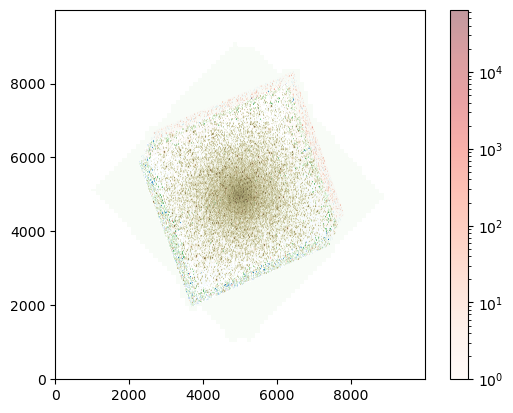

In [46]:
plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', cmap = 'Blues', norm = LogNorm())
plt.imshow(image_data_f336w, origin = 'lower', cmap = 'Greens', norm = LogNorm(), alpha = 0.8)
plt.imshow(image_data_f438w, origin = 'lower', cmap = 'Reds', norm = LogNorm(), alpha = 0.4)
plt.colorbar()
plt.show()

# 3. 광도 측정

In [47]:
# variable "section1" contains our image data
# variable "positions" contains our positions 
# variable "apertures" contains our aperture data

'''find background values by drawing an anulus around each star'''

# import tools 
from photutils.aperture import CircularAnnulus
from photutils.aperture import CircularAperture
from photutils.aperture import ApertureStats
from photutils.aperture import aperture_photometry



# define annuluses
annulus_aperture_f275w = CircularAnnulus(positions_f275w, r_in = 10, r_out = 15)
annulus_aperture_f336w = CircularAnnulus(positions_f336w, r_in = 10, r_out = 15)
annulus_aperture_f438w = CircularAnnulus(positions_f438w, r_in = 10, r_out = 15)

### Partial Region Visualization

In [48]:
# define annuluses of partial region

# 이상치가 제거된 범위 안에서 mean, median and standard deviation 찾기

from astropy.stats import sigma_clipped_stats
pmean_f275w, pmedian_f275w, pstd_f275w = sigma_clipped_stats(image_data_f275w[4500:4600, 4500:4600], sigma = 3.0) # 기본값이 sigma = 3
pmean_f336w, pmedian_f336w, pstd_f336w = sigma_clipped_stats(image_data_f336w[4500:4600, 4500:4600], sigma = 3.0)
pmean_f438w, pmedian_f438w, pstd_f438w = sigma_clipped_stats(image_data_f438w[4500:4600, 4500:4600], sigma = 3.0)

# 가우시안 커널을 이용하는 DAOStarFinder 이용, 소스 확인
# DAOStarFinder의 인스턴스를 사용하여 이미지에서 약 3픽셀의 FWHM을 가지며 배경보다 약 5 시그마 위에 피크가 있는 별을 찾도록 설정 
pdaofind_f275w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f275w)
pdaofind_f336w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f336w)
pdaofind_f438w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f438w)

# 백그라운드(배경)의 값을 빼준 2D-array에서 별을 찾도록 daofind 함수 적용
psources_f275w = daofind_f275w(image_data_f275w[4500:4600, 4500:4600] - pmedian_f275w)
psources_f336w = daofind_f336w(image_data_f336w[4500:4600, 4500:4600] - pmedian_f336w)
psources_f438w = daofind_f438w(image_data_f438w[4500:4600, 4500:4600] - pmedian_f438w)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f275w = np.transpose((psources_f275w['xcentroid'], psources_f275w['ycentroid']))
papertures_f275w = CircularAperture(ppositions_f275w, r = 5.0)
pannulus_aperture_f275w = CircularAnnulus(ppositions_f275w, r_in = 10, r_out = 15)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f336w = np.transpose((psources_f336w['xcentroid'], psources_f336w['ycentroid']))
papertures_f336w = CircularAperture(ppositions_f336w, r = 5.0)
pannulus_aperture_f336w = CircularAnnulus(ppositions_f336w, r_in = 10, r_out = 15)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f438w = np.transpose((psources_f438w['xcentroid'], psources_f438w['ycentroid']))
papertures_f438w = CircularAperture(ppositions_f438w, r = 5.0)
pannulus_aperture_f438w = CircularAnnulus(ppositions_f438w, r_in = 10, r_out = 15)

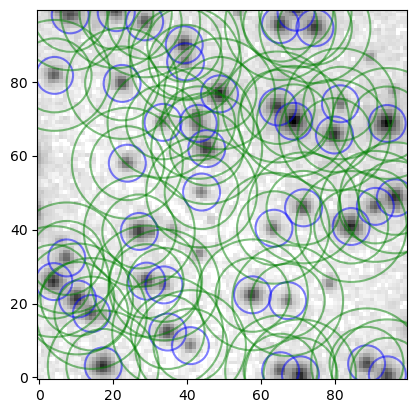

In [49]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f275w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f275w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f275w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

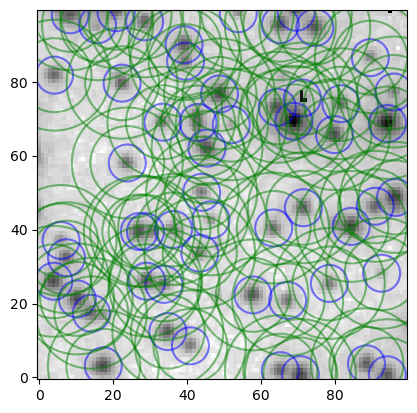

In [50]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f336w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f336w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f336w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

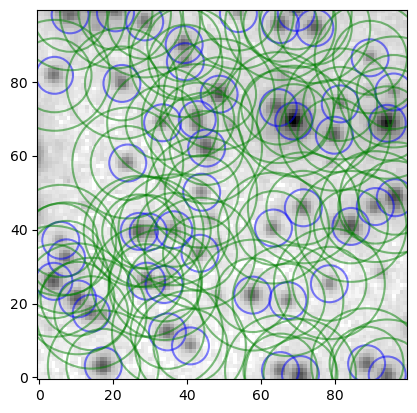

In [51]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f438w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f438w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f438w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

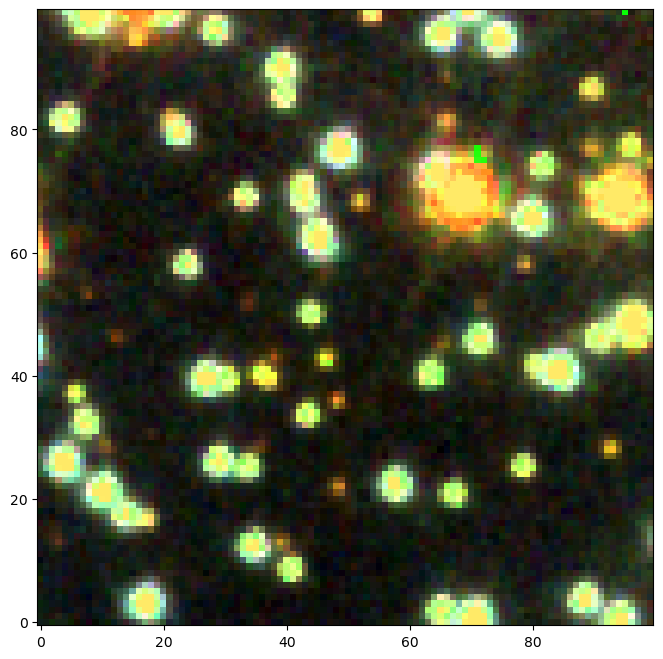

In [129]:
# stretch와 Q값 조절 # 2

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 

b = image_data_f275w[4500:4600, 4500:4600].copy()
g = image_data_f336w[4500:4600, 4500:4600].copy()
r = image_data_f438w[4500:4600, 4500:4600].copy()


t_r = 320
r[r > t_r] = t_r

t_g = 500
g[g > t_g] = t_g

t_b = 100
b[b > t_b] = t_b

lupton_rgb1 = make_lupton_rgb(r*1.7, g*1.0, b*2.2, stretch = 100, Q = 0.01, filename="plot/ngc0362_lupton_rgb_partial_1.png")
plt.figure(figsize= (8, 8))
plt.imshow(lupton_rgb1, origin='lower')

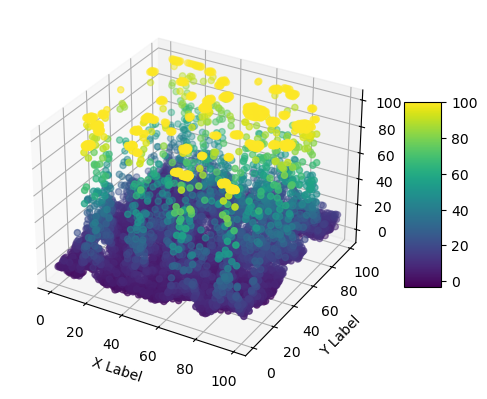

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# truncation을 실시한 R-channel(f438w) 데이터에 대한 3차원 시각화
matrix = r.copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure()

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 행렬의 값을 z 좌표로 사용하여 3D 산점도를 그립니다.
z = matrix.flatten()
scatter = ax.scatter(x.flatten(), y.flatten(), z, c = z, cmap = 'viridis')
fig.colorbar(scatter, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 그래프를 표시합니다.
plt.show()


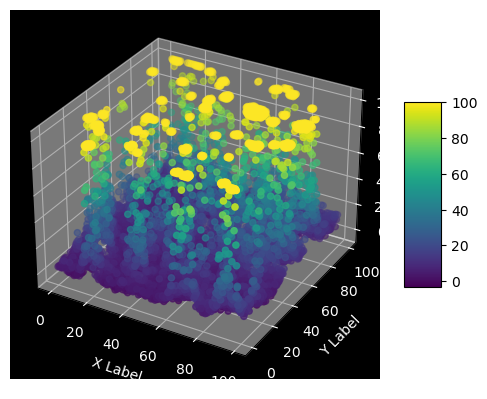

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# truncation을 실시한 R-channel(f438w) 데이터에 대한 3차원 시각화
matrix = r.copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure()

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 배경색을 검은색으로 설정합니다.
ax.set_facecolor('black')

# 행렬의 값을 z 좌표로 사용하여 3D 산점도를 그립니다.
z = matrix.flatten()
scatter = ax.scatter(x.flatten(), y.flatten(), z, c = z, cmap = 'viridis')
fig.colorbar(scatter, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 레이블을 추가하고 색상을 흰색으로 설정합니다.
ax.set_xlabel('X Label', color='white')
ax.set_ylabel('Y Label', color='white')
ax.set_zlabel('Z Label', color='white')

# 눈금의 색상을 변경합니다.
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')


# 그래프를 표시합니다.
plt.show()



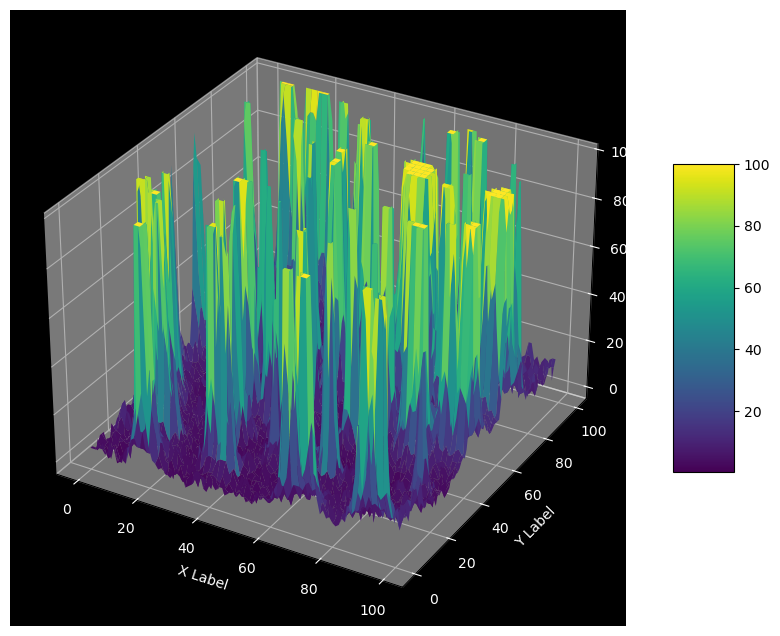

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# truncation을 실시한 R-channel(f438w) 데이터에 대한 3차원 시각화
matrix = r.copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure(figsize=(12, 8))

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 배경색을 검은색으로 설정합니다.
ax.set_facecolor('black')

# 표면 그래프 그리기
surf = ax.plot_surface(x, y, matrix, cmap='viridis')

# 컬러 바를 추가합니다.
fig.colorbar(surf, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 레이블을 추가하고 색상을 흰색으로 설정합니다.
ax.set_xlabel('X Label', color='white')
ax.set_ylabel('Y Label', color='white')
ax.set_zlabel('Z Label', color='white')

# 눈금의 색상을 변경합니다.
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')


# 그래프를 표시합니다.
plt.show()



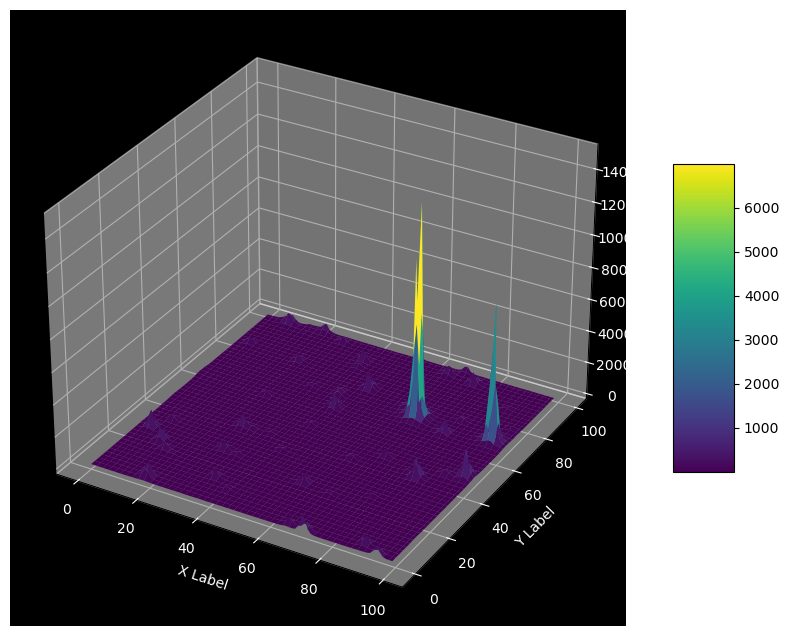

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 임의의 2차원 행렬을 생성합니다.
matrix = image_data_f438w[4500:4600, 4500:4600].copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure(figsize=(12, 8))

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 배경색을 검은색으로 설정합니다.
ax.set_facecolor('black')

# 표면 그래프 그리기
surf = ax.plot_surface(x, y, matrix, cmap='viridis')

# 컬러 바를 추가합니다.
fig.colorbar(surf, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 레이블을 추가하고 색상을 흰색으로 설정합니다.
ax.set_xlabel('X Label', color='white')
ax.set_ylabel('Y Label', color='white')
ax.set_zlabel('Z Label', color='white')

# 눈금의 색상을 변경합니다.
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')


# 그래프를 표시합니다.
plt.show()



In [57]:
matrix.max()

15193.0

### define background and perform aperture photometry

In [58]:
# define background_f275w
aperstats_f275w = ApertureStats(image_data_f275w, annulus_aperture_f275w)
bkg_mean_f275w = aperstats_f275w.mean
aperture_area_f275w = apertures_f275w.area_overlap(image_data_f275w)
total_bkg_f275w = bkg_mean_f275w * aperture_area_f275w

# define background_336w
aperstats_f336w = ApertureStats(image_data_f336w, annulus_aperture_f336w)
bkg_mean_f336w = aperstats_f336w.mean
aperture_area_f336w = apertures_f336w.area_overlap(image_data_f336w)
total_bkg_f336w = bkg_mean_f336w * aperture_area_f336w

# define background_435w
aperstats_f438w = ApertureStats(image_data_f438w, annulus_aperture_f438w)
bkg_mean_f438w = aperstats_f438w.mean
aperture_area_f438w = apertures_f438w.area_overlap(image_data_f438w)
total_bkg_f438w = bkg_mean_f438w * aperture_area_f438w

# perform aperture photometry
star_data_f275w = aperture_photometry(image_data_f275w, apertures_f275w)
star_data_f336w = aperture_photometry(image_data_f336w, apertures_f336w)
star_data_f438w = aperture_photometry(image_data_f438w, apertures_f438w)


# add backgrounds to table
star_data_f275w['total_bkg'] = total_bkg_f275w
star_data_f336w['total_bkg'] = total_bkg_f336w
star_data_f438w['total_bkg'] = total_bkg_f438w



In [59]:
# format and print data
for col in star_data_f275w.colnames:
    star_data_f275w[col].info.format = '%.8g'

star_data_f275w.pprint()

  id   xcenter   ycenter  aperture_sum total_bkg 
         pix       pix                           
----- --------- --------- ------------ ----------
    1 3708.5703 1967.5368    1429.9652 -15.786898
    2 3711.9955  1984.804    1525.0077  33.374426
    3 3728.3683 1984.5837    8173.2779  2190.0757
    4 3725.5317 1994.7178    4714.8922  4475.1789
    5 3721.0195  2001.158    1413.1896   107.6434
    6 3754.3262 2000.8797    1111.4179  299.84315
  ...       ...       ...          ...        ...
35841 6293.4319 8242.8163     227.5636 -14.060837
35842 6455.3891 8250.8847    2786.9614  24.257867
35843 6348.9447 8257.1643    11475.109 -10.991577
35844 6418.1067 8261.4424    2046.8553 0.40173819
35845 6365.3147 8270.5855    2757.3344 -4.6082035
35846 6404.8064 8288.4027    3856.2181 -4.4191201
35847 6441.9891 8295.6579    11339.715  15.548492
Length = 35847 rows


In [60]:
# format and print data
for col in star_data_f336w.colnames:
    star_data_f336w[col].info.format = '%.8g'

star_data_f336w.pprint()

  id   xcenter   ycenter  aperture_sum total_bkg 
         pix       pix                           
----- --------- --------- ------------ ----------
    1  3688.397 1974.0542    914.05599  2.4104291
    2  3728.416 1975.7979    2049.4567 0.60260729
    3 3693.9358 1979.9594    1137.5371 -86.912081
    4 3745.4432 1983.3443    1244.0606  324.80533
    5  3718.645 1990.6249    1947.2171  59.359141
    6 3747.1156 1996.3128    1489.7736   668.2879
  ...       ...       ...          ...        ...
48982 6265.1645 7928.4338    793.23849  113.69191
48983 6182.7532 7928.4906    1509.5285 -61.197268
48984 6306.9622  7938.544     1212.776 -37.562521
48985 6207.2852 7947.6635    327.58533  278.89649
48986 6221.6493 7951.5797    3013.3794   115.7006
48987 6237.0337 7951.5088    3466.0059  76.718016
48988 6239.8213 7960.6795    1183.3226  247.01072
Length = 48988 rows


In [61]:
# format and print data
for col in star_data_f438w.colnames:
    star_data_f438w[col].info.format = '%.8g'

star_data_f438w.pprint()

  id   xcenter   ycenter  aperture_sum total_bkg 
         pix       pix                           
----- --------- --------- ------------ ----------
    1 3757.0795 1997.8636    1342.2199 -142.85431
    2 3723.8459 2003.2271    1835.7272 -175.31209
    3 3727.5237 2005.7242    2154.7205 -172.19109
    4 3806.9914 2013.2423    1449.4032 -122.84433
    5 3669.2315 2019.6242    744.51195  18.398496
    6 3788.8529 2025.4074    120.26622 -55.957121
  ...       ...       ...          ...        ...
43077 6252.2041 8214.0732    2432.0199  -15.46692
43078 6232.2658 8215.9934    1793.2264    11.0478
43079 6296.3198 8230.2674    4611.8388 -14.588821
43080 6462.0964 8235.6868    1223.7774  34.461348
43081 6468.5321 8235.4773    3393.5661  33.631659
43082 6344.1259 8238.2933    2914.1748 -6.2110569
43083 6418.1632 8261.4162    2744.9734  44.994677
Length = 43083 rows


In [62]:
'''
find zeropoint from catalogue based on filter and instrument.
Install acs tools by typing the following command into the terminal:

$pip install acstools

ACStools: Python tools for Hubble Space Telescope Advanced Camera for Surveys data

The ACStools package contains Python tools to work with data 
from the Hubble Space Telescope (HST) Advanced Camera for Surveys (ACS). 
The package has several calibration utilities and a zeropoints calculator, 
can detect satellite trails, and offers destriping, polarization, and photometric tools.
'''
from acstools import acszpt

In [64]:
# header_f275w 정보 확인
print("==================f275w=================")
print(f"DATE in header: {header_f275w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f275w['INSTRUME']}")
print(f"FILTER in header: {header_f275w['FILTER']}")
print("-"*40)

# header_f336w 정보 확인
print("==================f336w=================")
print(f"DATE in header: {header_f336w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f336w['INSTRUME']}")
print(f"FILTER in header: {header_f336w['FILTER']}")
print("-"*50)

# header_f438w 정보 확인
print("==================f438w=================")
print(f"DATE in header: {header_f438w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f438w['INSTRUME']}")
print(f"FILTER in header: {header_f438w['FILTER']}")
print("-"*50)

==================f275w=================
DATE in header: 2012-09-09T06:00:03
INSTRUMENT in header: WFC3-UVIS
FILTER in header: F275W
----------------------------------------
==================f336w=================
DATE in header: 2012-09-09T06:11:20
INSTRUMENT in header: WFC3-UVIS
FILTER in header: F336W
--------------------------------------------------
==================f438w=================
DATE in header: 2012-09-09T05:56:29
INSTRUMENT in header: WFC3-UVIS
FILTER in header: F438W
--------------------------------------------------


In [65]:
# find date in header 
date_f275w = '2012-10-25' # 형식 '2006-03-10'
instrument_f275w = 'WFC'  # 'WFC'
filter_f275w = 'F275W'    # 'F814W'

# find date in header 
date_f336w = '2012-10-25' # 형식 '2006-03-10'
instrument_f336w = 'WFC'  # 'WFC'
filter_f336w = 'F336W'    # 'F814W'

# find date in header 
date_f438w = '2012-10-25' # 형식 '2006-03-10'
instrument_f438w = 'WFC'  # 'WFC'
filter_f438w = 'F438W'    # 'F814W'

In [66]:
# fetch zeropoint from catalogue
q_f438w = acszpt.Query(date = date_f438w, detector = instrument_f438w)
zpt_table_f438w = q_f438w.fetch()

q_filter_f438w = acszpt.Query(date = date_f438w, detector = instrument_f438w, filt = filter_f438w)
filter_zpt_f438w = q_filter_f438w.fetch()

# print data
print(filter_zpt_f438w)

ERROR:acszpt.Query:F438W is not a valid filter for WFC
Please choose one of the following:
F435W
F475W
F502N
F550M
F555W
F606W
F625W
F658N
F660N
F775W
F814W
F850LP
F892N
-------------------------------------------------------------------------------


None


In [67]:
# fetch zeropoint from catalogue
q_f336w = acszpt.Query(date = date_f336w, detector = instrument_f336w)
zpt_table_f336w = q_f336w.fetch()

q_filter_f336w = acszpt.Query(date = date_f336w, detector = instrument_f336w, filt = filter_f336w)
filter_zpt_f336w = q_filter_f336w.fetch()

# print data
print(filter_zpt_f336w)

ERROR:acszpt.Query:F336W is not a valid filter for WFC
Please choose one of the following:
F435W
F475W
F502N
F550M
F555W
F606W
F625W
F658N
F660N
F775W
F814W
F850LP
F892N
-------------------------------------------------------------------------------


None


acstools 패키지에서 정보 조회가 어려우므로 

다음의 참고 문헌의 zeropoint 사용 

<img src="./image/zeropoint.png" width="600" height="600"/>


In [68]:
# use ABmag from filter_zpt
zeropoint_f275w = 24.14
zeropoint_f336w = 24.64

# find exposure time in header
extime_f275w = header_f275w['EXPTIME']
extime_f336w = header_f336w['EXPTIME']

print(zeropoint_f275w)
print(zeropoint_f336w)
print(extime_f275w)
print(extime_f336w)

24.14
24.64
3114.0
1400.0


In [69]:
star_data_f275w_df = star_data_f275w.to_pandas()
star_data_f336w_df = star_data_f336w.to_pandas()

In [70]:
star_data_f275w_df.head()

id      xcenter      ycenter  aperture_sum    total_bkg
0   1  3708.570318  1967.536800   1429.965153   -15.786898
1   2  3711.995492  1984.804019   1525.007685    33.374426
2   3  3728.368324  1984.583690   8173.277874  2190.075748
3   4  3725.531656  1994.717820   4714.892177  4475.178852
4   5  3721.019522  2001.157987   1413.189551   107.643403

In [71]:
star_data_f336w_df.head()

id      xcenter      ycenter  aperture_sum   total_bkg
0   1  3688.397009  1974.054152    914.055990    2.410429
1   2  3728.415964  1975.797941   2049.456730    0.602607
2   3  3693.935808  1979.959440   1137.537096  -86.912081
3   4  3745.443204  1983.344253   1244.060630  324.805327
4   5  3718.644994  1990.624943   1947.217092   59.359141

## Magnitude 계산

**MAGNITUDE = ZEROPOINT - 2.5*log_10{(APERTURE_SUM - TOTAL_BKG)/EXTIME}**

$$ Magnitude = Zeropoint -2.5*log_{10}{((Aperture\;sum - total\;background)/exposure\;time)}$$

- f275w 사진과 f336w 사진에 찍힌 별들의 강도에 따라 식별되지 않을 수도 있으며, star find 알고리즘(daofind)에 따라 정확한 위치 값은 상이할 수 있으므로
- float 형태의 값은 버림하고 정수로 일치
- 그 후 inner join 실시

In [72]:
star_data_f275w_df['diff_f275w'] = star_data_f275w_df['aperture_sum'] - star_data_f275w_df['total_bkg']
star_data_f275w_df['mag_f275w'] = zeropoint_f275w - (2.5*np.log10(abs(star_data_f275w_df['diff_f275w'])/extime_f275w))
star_data_f275w_df.head()

id      xcenter      ycenter  aperture_sum    total_bkg   diff_f275w  \
0   1  3708.570318  1967.536800   1429.965153   -15.786898  1445.752050   
1   2  3711.995492  1984.804019   1525.007685    33.374426  1491.633259   
2   3  3728.368324  1984.583690   8173.277874  2190.075748  5983.202126   
3   4  3725.531656  1994.717820   4714.892177  4475.178852   239.713325   
4   5  3721.019522  2001.157987   1413.189551   107.643403  1305.546148   

   mag_f275w  
0  24.973062  
1  24.939141  
2  23.430962  
3  26.924066  
4  25.083816

In [73]:
star_data_f336w_df['diff_f336w'] = star_data_f336w_df['aperture_sum'] - star_data_f336w_df['total_bkg']
star_data_f336w_df['mag_f336w'] = zeropoint_f336w - (2.5*np.log10(abs(star_data_f336w_df['diff_f336w'])/extime_f336w))
star_data_f336w_df.head()

id      xcenter      ycenter  aperture_sum   total_bkg   diff_f336w  \
0   1  3688.397009  1974.054152    914.055990    2.410429   911.645561   
1   2  3728.415964  1975.797941   2049.456730    0.602607  2048.854123   
2   3  3693.935808  1979.959440   1137.537096  -86.912081  1224.449177   
3   4  3745.443204  1983.344253   1244.060630  324.805327   919.255302   
4   5  3718.644994  1990.624943   1947.217092   59.359141  1887.857950   

   mag_f336w  
0  25.105755  
1  24.226542  
2  24.785468  
3  25.096730  
4  24.315397

In [74]:
# Join을 위해 버림 실시

star_data_f275w_df['xcenter'] = np.floor(star_data_f275w_df['xcenter']).astype(int);
star_data_f275w_df['ycenter'] = np.floor(star_data_f275w_df['ycenter']).astype(int);

star_data_f336w_df['xcenter'] = np.floor(star_data_f336w_df['xcenter']).astype(int);
star_data_f336w_df['ycenter'] = np.floor(star_data_f336w_df['ycenter']).astype(int);

In [75]:
star_data_f275w_df.head()

id  xcenter  ycenter  aperture_sum    total_bkg   diff_f275w  mag_f275w
0   1     3708     1967   1429.965153   -15.786898  1445.752050  24.973062
1   2     3711     1984   1525.007685    33.374426  1491.633259  24.939141
2   3     3728     1984   8173.277874  2190.075748  5983.202126  23.430962
3   4     3725     1994   4714.892177  4475.178852   239.713325  26.924066
4   5     3721     2001   1413.189551   107.643403  1305.546148  25.083816

In [76]:
star_data_f336w_df.head()

id  xcenter  ycenter  aperture_sum   total_bkg   diff_f336w  mag_f336w
0   1     3688     1974    914.055990    2.410429   911.645561  25.105755
1   2     3728     1975   2049.456730    0.602607  2048.854123  24.226542
2   3     3693     1979   1137.537096  -86.912081  1224.449177  24.785468
3   4     3745     1983   1244.060630  324.805327   919.255302  25.096730
4   5     3718     1990   1947.217092   59.359141  1887.857950  24.315397

In [77]:
ngc0362_merge_df = pd.merge(star_data_f275w_df, star_data_f336w_df, how = 'inner', on = ['xcenter', 'ycenter'])

In [78]:
ngc0362_merge_df.head()

id_x  xcenter  ycenter  aperture_sum_x  total_bkg_x   diff_f275w  \
0    19     3761     2028     2901.066024   710.455591  2190.610433   
1    23     3800     2035      639.286288    -6.578208   645.864496   
2    43     3711     2066     8391.464238  1046.320388  7345.143850   
3    46     3762     2074     2061.552722    47.363706  2014.189016   
4    51     3726     2083      157.312785    38.968605   118.344181   

   mag_f275w  id_y  aperture_sum_y  total_bkg_y    diff_f336w  mag_f336w  
0  24.521884    16     9083.162458   187.533847   8895.628611  22.632378  
1  25.847943    17     2713.755855   -60.908429   2774.664284  23.897294  
2  23.208296    29    43210.428183  4011.169389  39199.258794  21.022125  
3  24.613046    33     6876.065314    72.513743   6803.551571  22.923481  
4  27.690429    46      189.476159    91.362643     98.113515  27.525998

In [79]:
print(ngc0362_merge_df.shape)
print(ngc0362_merge_df.columns)

(27140, 12)
Index(['id_x', 'xcenter', 'ycenter', 'aperture_sum_x', 'total_bkg_x',
       'diff_f275w', 'mag_f275w', 'id_y', 'aperture_sum_y', 'total_bkg_y',
       'diff_f336w', 'mag_f336w'],
      dtype='object')


In [80]:
ngc0362_merge_df['diff_mag'] = ngc0362_merge_df['mag_f275w'] - ngc0362_merge_df['mag_f336w']

### CMD 그리기

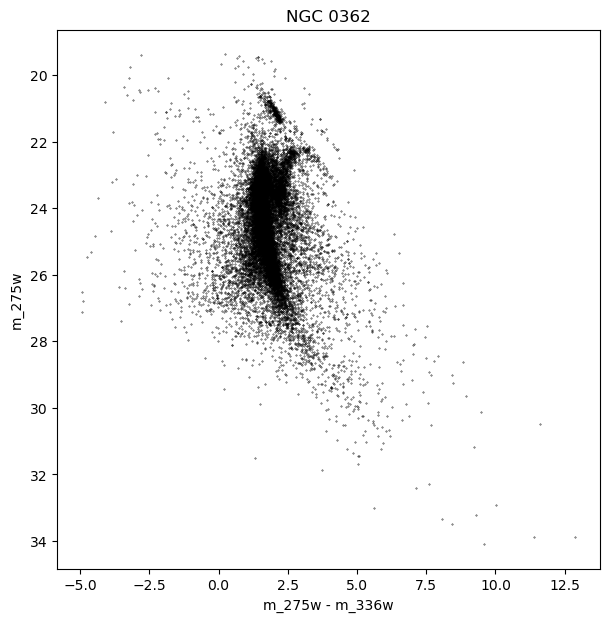

In [81]:
plt.figure(figsize = (7, 7))
plt.scatter(x = ngc0362_merge_df['diff_mag'],
            y = ngc0362_merge_df['mag_f275w'],
            s = 0.1,
            c = 'black')
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("NGC 0362")
plt.gca().invert_yaxis()
plt.show()

### 백그라운드 제외, CMD 그리기

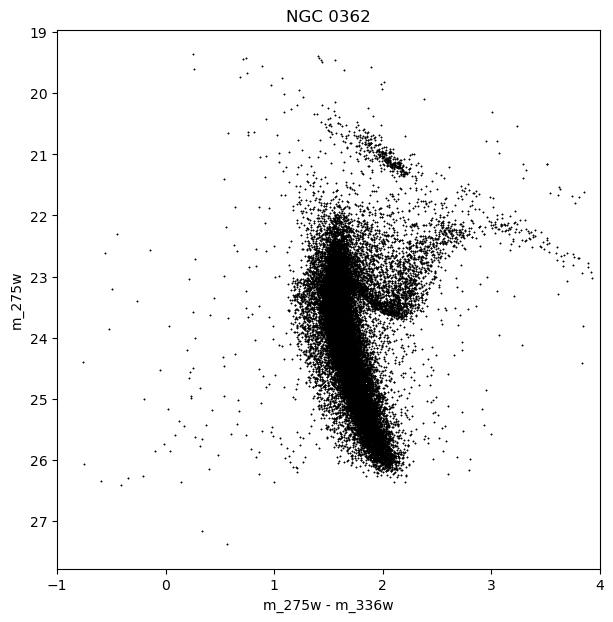

In [106]:
# total background의 값을 0 으로 가정

star_data_f275w_df['assumed_f275w'] = star_data_f275w_df['aperture_sum']  # total background = 0 
star_data_f275w_df['assumed_mag_f275w'] = zeropoint_f275w - (2.5*np.log10(abs(star_data_f275w_df['assumed_f275w'])/extime_f275w))

star_data_f336w_df['assumed_f336w'] = star_data_f336w_df['aperture_sum'] # total background = 0 
star_data_f336w_df['assumed_mag_f336w'] = zeropoint_f336w - (2.5*np.log10(abs(star_data_f336w_df['assumed_f336w'])/extime_f336w))

ngc0104_merge_df2 = pd.merge(star_data_f275w_df, star_data_f336w_df, how = 'inner', on = ['xcenter', 'ycenter'])

ngc0104_merge_df2['assumed_diff_mag'] = ngc0104_merge_df2['assumed_mag_f275w'] - ngc0104_merge_df2['assumed_mag_f336w']


plt.figure(figsize = (7, 7))
plt.scatter(x = ngc0104_merge_df2['assumed_diff_mag'],
            y = ngc0104_merge_df2['assumed_mag_f275w'],
            s = 0.1,
            color = 'black',
            marker = '*')
# plt.ylim(15.5, 24.5)
plt.xlim(-1, 4)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("NGC 0362")
plt.gca().invert_yaxis()
plt.show()

### NGC0362 CMD

* HST UV Globular Cluster Survey ngc0362 연구 결과
  
<img src="HUGS/ngc0362/hlsp_hugs_hst_wfc3-uvis_ngc0362_multi_v1_cmd.png" width="600" height="600"/>

# 4. 데이터 셋에서 CMD 그리기

In [82]:
folder_path = '/Users/younghokim/astro/prj1_HUGS/HUGS/ngc0362'

In [83]:
os.listdir(folder_path)

['hlsp_hugs_hst_wfc3-uvis_ngc0362_multi_v1_rgb.tif',
 'hlsp_hugs_hst_wfc3-uvis_ngc0362_f275w_v1_stack-0519s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc0362_f814w_v1_stack-0170s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc0362_f606w_v1_stack-0150s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc0362_multi_v1_rgb.png',
 'hlsp_hugs_hst_acs-wfc_ngc0362_f606w_v1_stack-0010s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc0362_f814w_v1_stack-0010s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc0362_f336w_v1_stack-0350s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc0362_f438w_v1_stack-0054s.fits',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0362_multi_v1_catalog-meth3.txt',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0362_multi_v1_catalog-meth2.txt',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0362_multi_v1_catalog-meth1.txt',
 'hlsp_hugs_hst_wfc3-uvis_ngc0362_multi_v1_cmd.png']

In [84]:
os.getcwd()

'/Users/younghokim/astro/prj1_HUGS'

In [85]:
col_names = [ 'X1',  'X2',  'X3',  'X4',  'X5',  'X6',  'X7',  'X8',  'X9', 'X10',
             'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
             'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
             'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37']

In [86]:
multi_df1 = pd.read_csv("HUGS/ngc0362/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0362_multi_v1_catalog-meth1.txt", 
                        skiprows = 54, names = col_names,
                        header = None, delim_whitespace = True)
multi_df1.head()

X1         X2       X3       X4   X5      X6  X7  X8       X9  \
0  5074.6230  1356.4366 -99.9999  99.9999  0.0  9.9999   0   0 -99.9999   
1  5043.6167  1362.7256 -99.9999  99.9999  0.0  9.9999   0   0 -99.9999   
2  5070.2817  1373.5472 -99.9999  99.9999  0.0  9.9999   0   0 -99.9999   
3  4915.1445  1381.5315 -99.9999  99.9999  0.0  9.9999   0   0 -99.9999   
4  4892.9907  1392.0903 -99.9999  99.9999  0.0  9.9999   0   0 -99.9999   

       X10  ...  X28     X29     X30  X31  X32  X33        X34        X35  \
0  99.9999  ...  0.0  1.0000  0.0000   99   99 -1.0  15.807008 -70.888782   
1  99.9999  ...  0.0  1.0000  0.0046    1    1 -1.0  15.808047 -70.888713   
2  99.9999  ...  0.0  0.9994 -0.0137    1    1 -1.0  15.807153 -70.888594   
3  99.9999  ...  0.0  1.0000  0.0000   99   99 -1.0  15.812351 -70.888507   
4  99.9999  ...  0.0  0.9998 -0.0140    1    1 -1.0  15.813094 -70.888391   

        X36  X37  
0  R0000001    1  
1  R0000002    1  
2  R0000003    1  
3  R0000004    1  
4  R0000005    1  

[5 rows x 37 columns]

In [87]:
multi_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144320 entries, 0 to 144319
Data columns (total 37 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      144320 non-null  float64
 1   X2      144320 non-null  float64
 2   X3      144320 non-null  float64
 3   X4      144320 non-null  float64
 4   X5      144320 non-null  float64
 5   X6      144320 non-null  float64
 6   X7      144320 non-null  int64  
 7   X8      144320 non-null  int64  
 8   X9      144320 non-null  float64
 9   X10     144320 non-null  float64
 10  X11     144320 non-null  float64
 11  X12     144320 non-null  float64
 12  X13     144320 non-null  int64  
 13  X14     144320 non-null  int64  
 14  X15     144320 non-null  float64
 15  X16     144320 non-null  float64
 16  X17     144320 non-null  float64
 17  X18     144320 non-null  float64
 18  X19     144320 non-null  int64  
 19  X20     144320 non-null  int64  
 20  X21     144320 non-null  float64
 21  X22     14

In [88]:
multi_df1.describe().round()

X1        X2        X3        X4        X5        X6        X7  \
count  144320.0  144320.0  144320.0  144320.0  144320.0  144320.0  144320.0   
mean     5004.0    5022.0     -16.0      34.0       0.0       3.0       2.0   
std      1230.0    1270.0      58.0      69.0       0.0       5.0       2.0   
min      1296.0    1275.0    -100.0       0.0       0.0      -1.0       0.0   
25%      4201.0    4206.0    -100.0       0.0       0.0      -0.0       0.0   
50%      5007.0    5016.0      22.0       0.0       0.0       0.0       2.0   
75%      5812.0    5839.0      25.0     100.0       1.0      10.0       4.0   
max      8629.0    8803.0      29.0    7936.0       1.0      10.0      99.0   

             X8        X9       X10  ...       X27       X28       X29  \
count  144320.0  144320.0  144320.0  ...  144320.0  144320.0  144320.0   
mean        1.0     -19.0      35.0  ...      20.0       1.0       1.0   
std         1.0      58.0      55.0  ...      12.0      10.0       0.0   
min         0.0    -100.0       0.0  ...    -100.0       0.0       0.0   
25%         0.0    -100.0       0.0  ...      20.0       0.0       1.0   
50%         1.0      20.0       0.0  ...      22.0       0.0       1.0   
75%         1.0      24.0     100.0  ...      23.0       0.0       1.0   
max        99.0      30.0    6120.0  ...      31.0     210.0       1.0   

            X30       X31       X32       X33       X34       X35       X37  
count  144320.0  144320.0  144320.0  144320.0  144320.0  144320.0  144320.0  
mean        1.0       4.0       1.0      39.0      16.0     -71.0       3.0  
std         2.0       5.0       5.0      48.0       0.0       0.0       1.0  
min        -1.0       0.0       0.0      -1.0      16.0     -71.0       1.0  
25%        -0.0       3.0       1.0      -1.0      16.0     -71.0       2.0  
50%         0.0       4.0       1.0      -1.0      16.0     -71.0       3.0  
75%         0.0       4.0       1.0      97.0      16.0     -71.0       3.0  
max        10.0      99.0      99.0     100.0      16.0     -71.0       6.0  

[8 rows x 36 columns]

In [89]:
print(multi_df1.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37'],
      dtype='object')


CMD 그릴 때 다시 활용해보고자 하는 컬럼

- X3 (f275w calibrated magnitude)
- X9 (f336w calibrated magnitude)

In [90]:
import copy

multi_df1_back_up = copy.deepcopy(multi_df1)

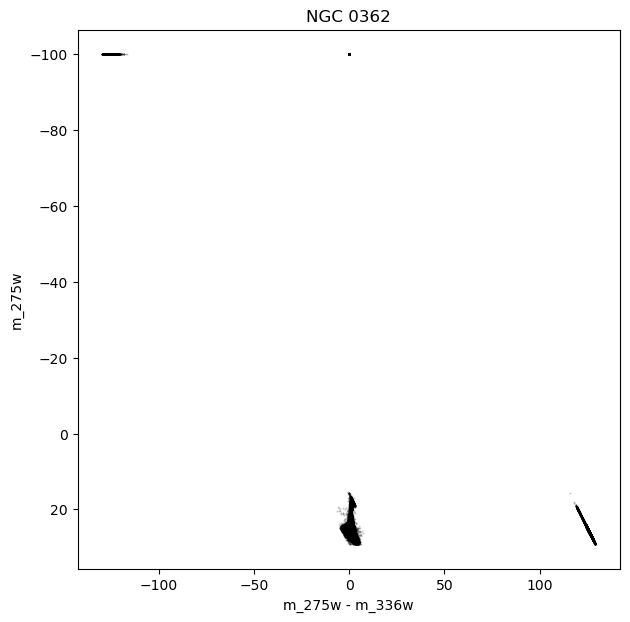

In [91]:
plt.figure(figsize = (7, 7))
plt.scatter(x = multi_df1.X3 - multi_df1.X9,
            y = multi_df1.X3,
            s = 0.1,
            c = 'Black',
            marker = '*',
            alpha = 0.2)
# plt.ylim(15.5, 24.5)
# plt.xlim(-1, 3.5)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("NGC 0362")
plt.gca().invert_yaxis()
plt.show()

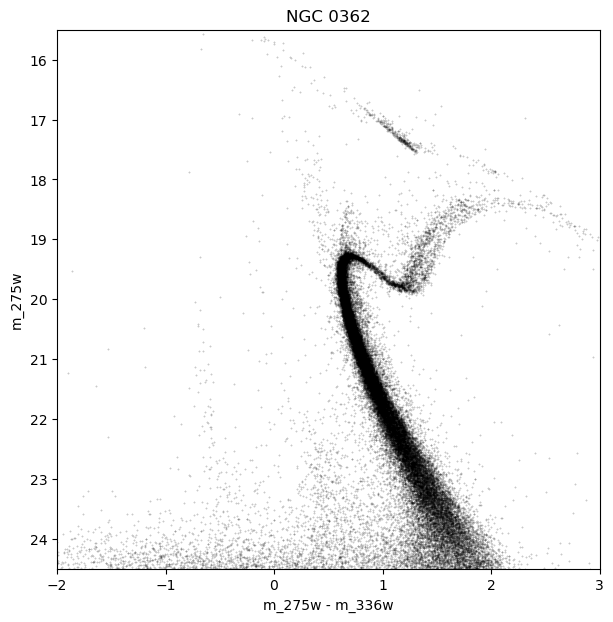

In [92]:
# 백그라운 및 아웃라이어 부근을 제외하고 구상성단 색등급도 영역 부분으로 한정지어 플랏함

plt.figure(figsize = (7, 7))
plt.scatter(x = multi_df1.X3 - multi_df1.X9,
            y = multi_df1.X3,
            s = 0.1,
            c = 'Black',
            marker = '*',
            alpha = 0.2)
plt.ylim(15.5, 24.5)
plt.xlim(-2, 3.0)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("NGC 0362")
plt.gca().invert_yaxis()
plt.show()

In [93]:
multi_df1["Colour(B-V)"] = multi_df1["X3"] - multi_df1["X9"]

# 백그라운드 및 불용값에 의한 연산 결과는 배제하고자 아래 조건으로 필터링을 실시
# -1 =< Colour(B-V) <= 3
# -10 =< X3 <= 30
filtered_df = multi_df1.query("`Colour(B-V)` >= -1 and `Colour(B-V)` <= 3.5 and X3 >= -10 and X3 <= 30")

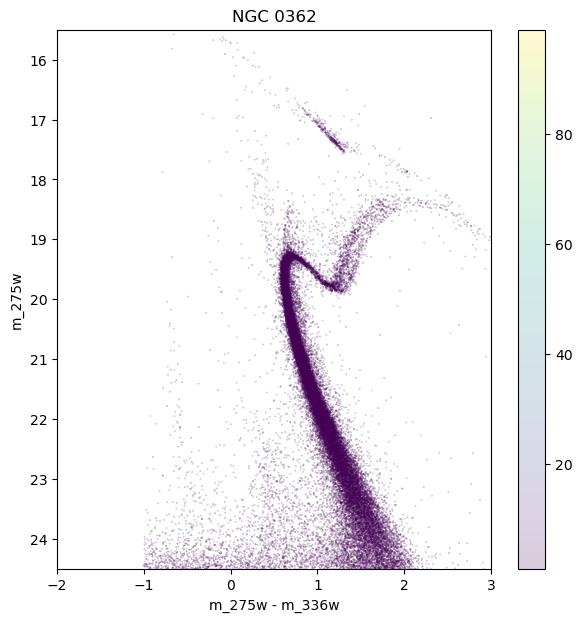

In [94]:
plt.figure(figsize = (7, 7))
plt.scatter(x = filtered_df.X3 - filtered_df.X9,
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df.X8,
            cmap = 'viridis',
            marker = '*',
            alpha = 0.2)
plt.ylim(15.5, 24.5)
plt.xlim(-2, 3.0)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("NGC 0362")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

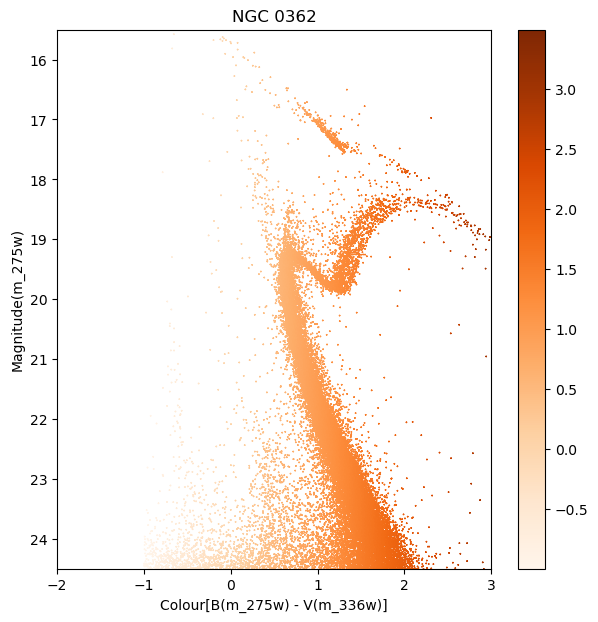

In [95]:
plt.figure(figsize = (7, 7))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'Oranges',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-2, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("NGC 0362")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

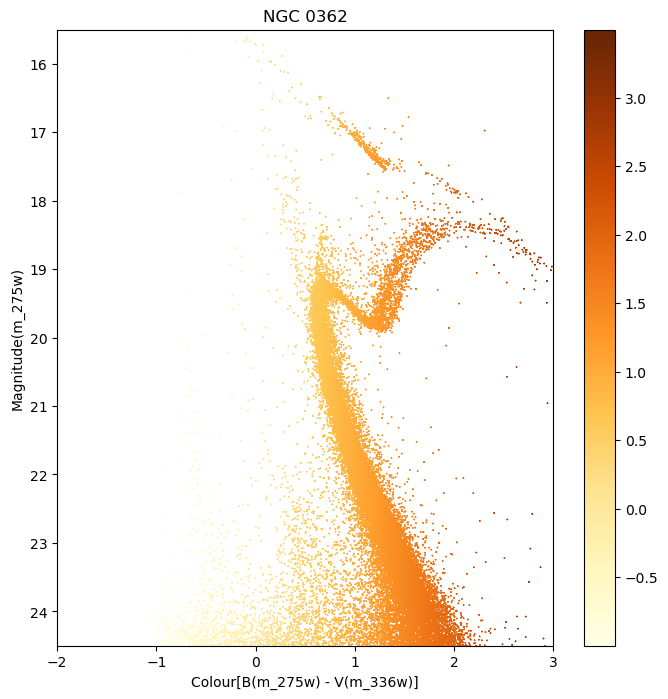

In [96]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'YlOrBr',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-2, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("NGC 0362")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

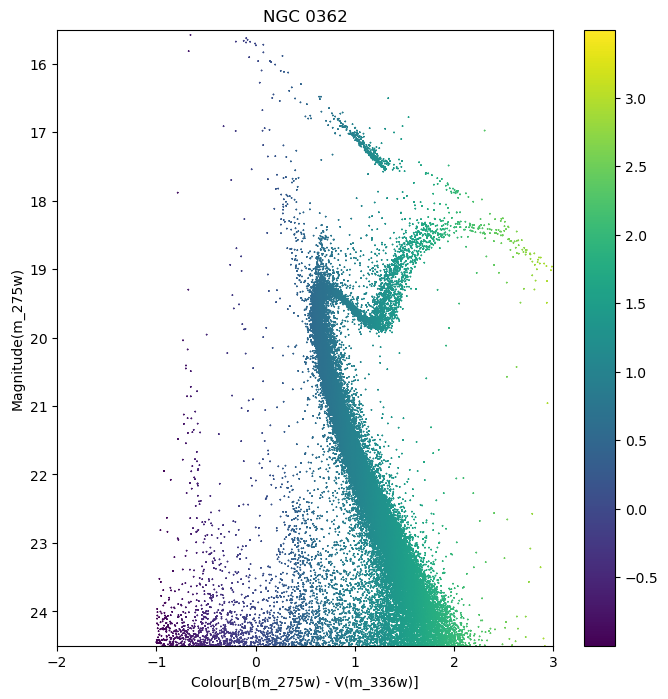

In [97]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'viridis',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-2, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("NGC 0362")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

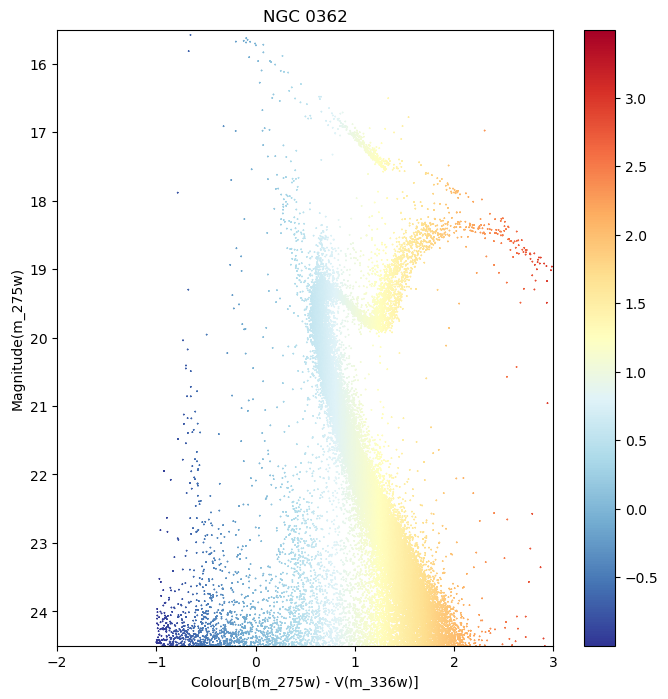

In [98]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'RdYlBu_r',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-2, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("NGC 0362")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

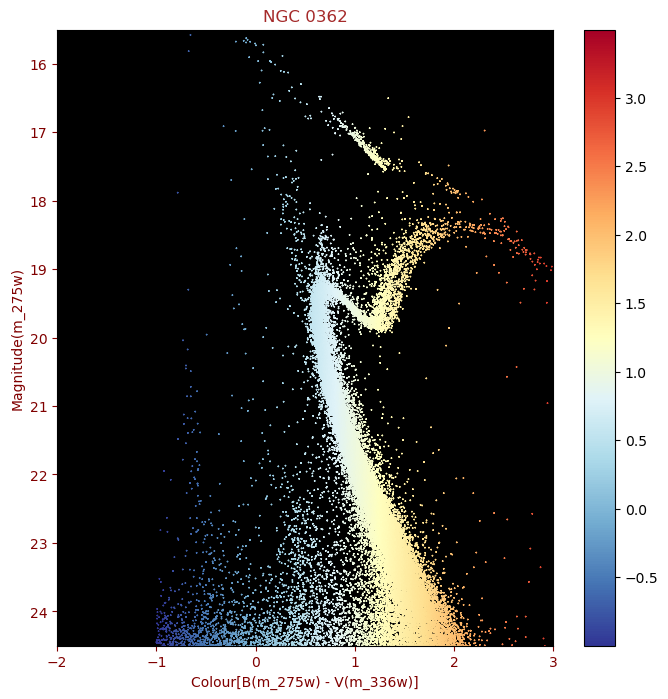

In [99]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'RdYlBu_r',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-2, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("NGC 0362")
plt.colorbar()
plt.gca().invert_yaxis()

# 축의 배경색을 검은색으로 설정
plt.gca().set_facecolor('black')

# x축과 y축의 텍스트, 타이틀의 색상을 변경해야 배경과 대비
plt.xlabel("Colour[B(m_275w) - V(m_336w)]", color='maroon')
plt.ylabel("Magnitude(m_275w)", color='maroon')
plt.title("NGC 0362", color='Brown')
plt.tick_params(colors='maroon')  # 축의 틱 색상을 변경

plt.show()

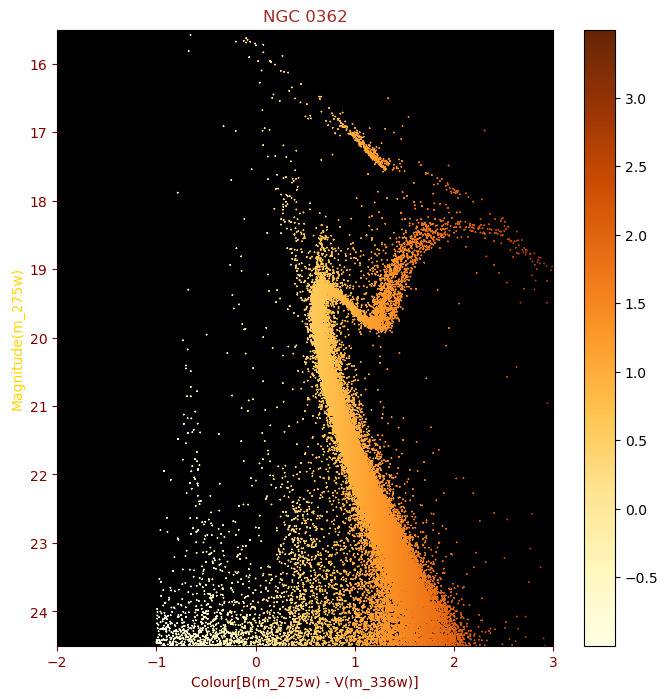

In [100]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'YlOrBr',
            marker = '*',
            alpha = 1)

plt.ylim(15.5, 24.5)
plt.xlim(-2, 3.0)

plt.colorbar()
plt.gca().invert_yaxis()

# 축의 배경색을 검은색으로 설정
plt.gca().set_facecolor('black')

# x축과 y축의 텍스트, 타이틀의 색상을 변경해야 배경과 대비
plt.xlabel("Colour[B(m_275w) - V(m_336w)]", color='maroon')
plt.ylabel("Magnitude(m_275w)", color='gold')
plt.title("NGC 0362", color='Brown')
plt.tick_params(colors='maroon')  # 축의 틱 색상을 변경

plt.show()

* HST UV Globular Cluster Survey ngc0362 연구 결과
  
<img src="HUGS/ngc0362/hlsp_hugs_hst_wfc3-uvis_ngc0362_multi_v1_cmd.png" width="600" height="600"/>


**비교** 위키백과의 헤르츠스프룽-러셀 도표

<img src="./image/cmd.png" width="600" height="800"/>